## Student Performance Indicator 

#### Life cycle of Machine learning Project
1. Understanding the Problem Statement
2. Data Collection
3. Data checks to perform 
4. Exploratory data analysis
5. Data Pre-processing
6. Model Training
7. Choose best model 

### 1. Problem statement
- This project understand how the student's performance (test-score) is affected by other variable such as Parental level of education, Lunch and Test preparation course. 

### 2. Data Collection 
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.



In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
## importing the csv data as Pandas Dataframe 
data_path = '../data/students.csv'
df = pd.read_csv(data_path)

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [7]:
df.race_ethnicity.value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [8]:
df.parental_level_of_education.value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [9]:
df.lunch.value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [10]:
df.test_preparation_course.value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

#### Observation
- Dataset contains 8 column and 1000 rows.
- Categorical Variable - Total 5 columns
    - gender : sex of student 
        - female    518
        - male      482
    - race/ ethnicity : ethnicity of students
        - group A     89
        - group B    190
        - group C    319
        - group D    262
        - group E    140
    - parential level of education : parents final education
        - some college          226
        - associate's degree    222
        - high school           196
        - some high school      179
        - bachelor's degree     118
        - master's degree        59
    - lunch : Having lunch before test
        - standard        645 
        - free/reduced    355
    - test preparation course :
        - none         642
        - completed    358    
- Numerical variable - Total 3 columns
    - math_score
    - reading_score
    - writing_score

### 3. Data checks to Perform
- Check missing values
- Check duplicates 
- Check data type
- Check the number of unique values of each columns
- Check statistics of dataset
- Check various categories present in the different categorical column

In [11]:
## 3.1 checking missing values 
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Insights : There are no missing values in the data set

In [12]:
## 3.2 Checking for duplicates 
df.duplicated().sum()

0

Insights : There are no duplicates values in the dataset

In [13]:
## 3.3 check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
## 3.4 Checking the number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
## 3.5 Checking Statistics of dataset - Numerical Values
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights: 
- From above description of numerical data, all means are very close to each other - between 66 to 68.05
- All standard deviation are also close - between 14.6 to 15.19
- While ther is a minimum score 0 for math, for writing is much higher 10 and for reading it is 17.

In [16]:
## 3.6 Adding columns for "Total Score" and "Avarage Score"
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"] / 3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [17]:
df.describe()

,math_score,reading_score,writing_score,total_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [18]:
## Getting full and less score into all subjects 
reading_100 = df[df['reading_score']==100]['average_score'].count()
maths_100 = df[df['math_score']==100]['average_score'].count()
writing_100 = df[df['writing_score']==100]['average_score'].count()

print(f"Number of students with full marks in Maths : {maths_100}")
print(f"Number of students with full marks in Writing: {writing_100}")
print(f"Number of students with full marks in Reading: {reading_100}")

reading_less_20 = df[df['reading_score']<=20]['average_score'].count()
writing_less_20 = df[df['writing_score']<=20]['average_score'].count()
math_less_20 = df[df['math_score']<=20]['average_score'].count()

print(f"Number of student with less than 20 marks in Maths: {math_less_20}")
print(f"Number of student with less than 20 marks in Read: {reading_less_20}")
print(f"Number of student with less than 20 marks in Write: {writing_less_20}")

Number of students with full marks in Maths : 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17
Number of student with less than 20 marks in Maths: 4
Number of student with less than 20 marks in Read: 1
Number of student with less than 20 marks in Write: 3


Insights:
- Students have performed the worst in Maths and perform best in Reading

### 4. Exploring Data (Visulization)
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

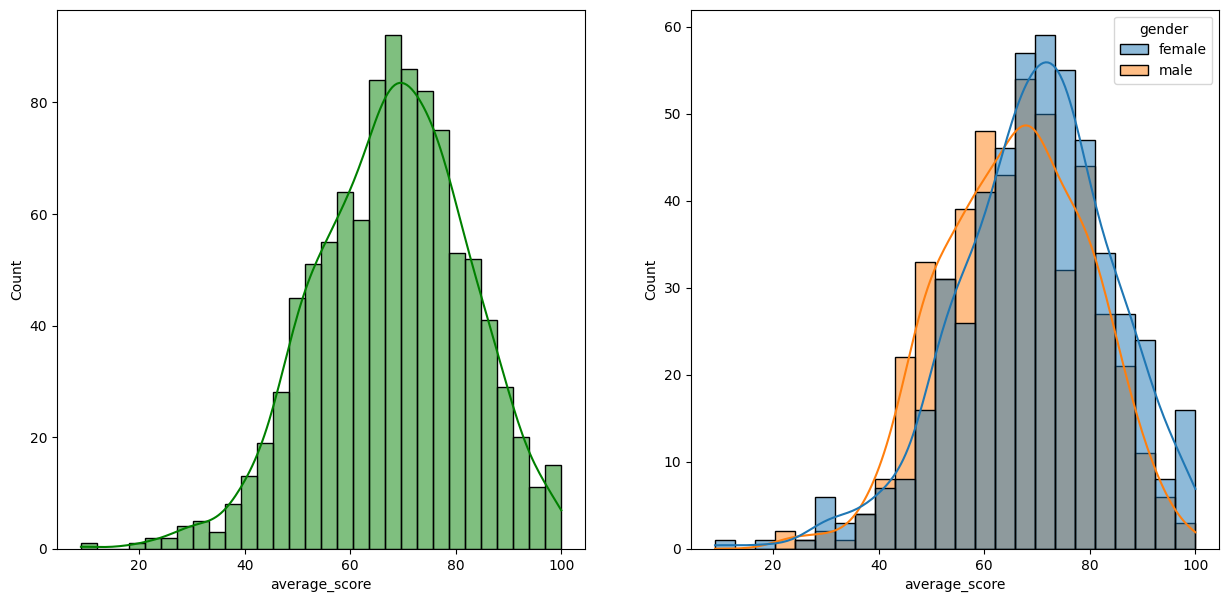

In [19]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x="average_score", bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="average_score", kde=True, hue="gender")
plt.show()

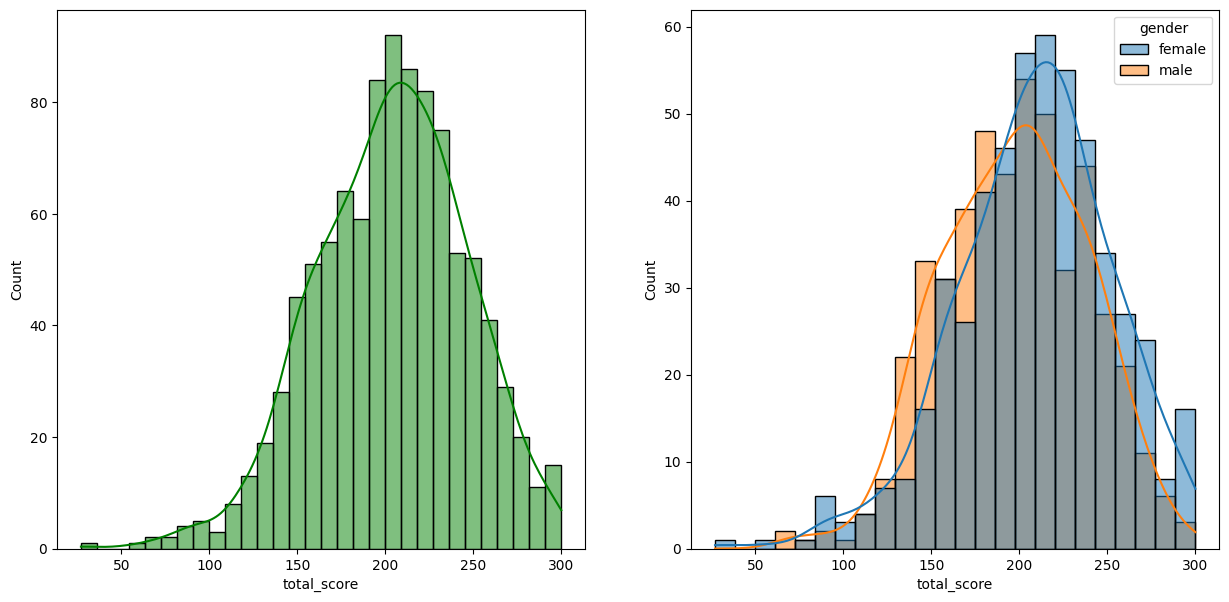

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x="total_score", bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="total_score", kde=True, hue="gender")
plt.show()

Insights : Female students tend to perform well then male students.

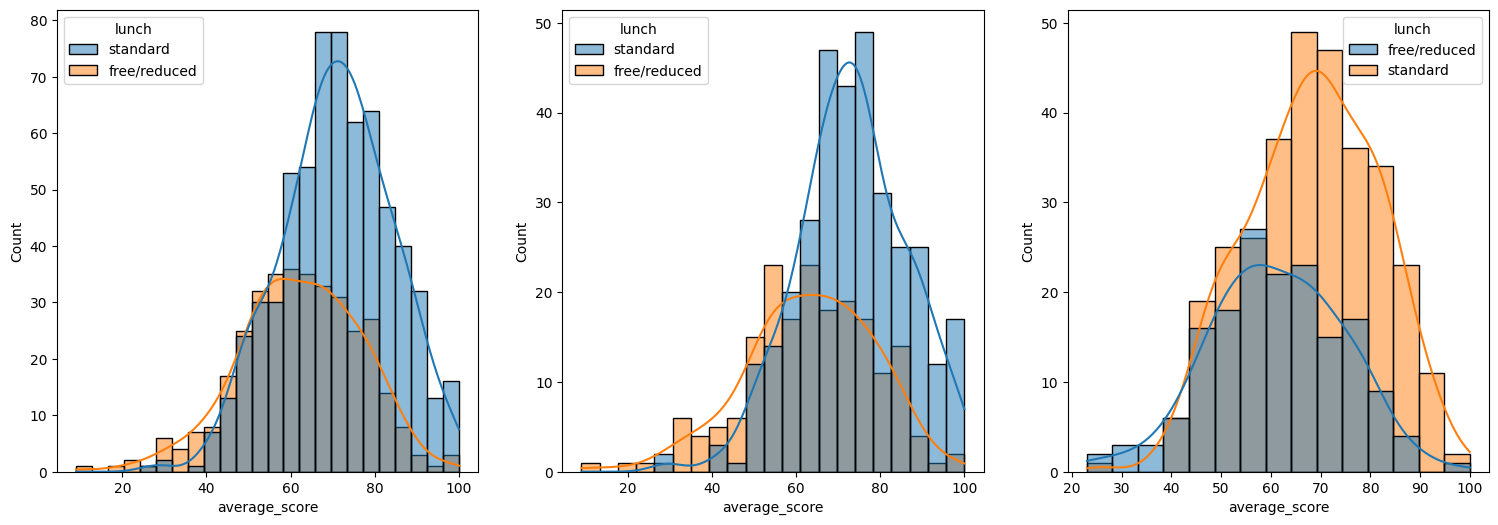

In [21]:
## Visualizing avarage for male and female according to lunch 
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x="average_score", kde=True, hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender == "female"], x="average_score", kde=True, hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"], x="average_score", kde=True, hue="lunch")
plt.show()

Insights : Standard lunch helps perform well in exams for both male and female

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


<Axes: xlabel='average_score', ylabel='Count'>

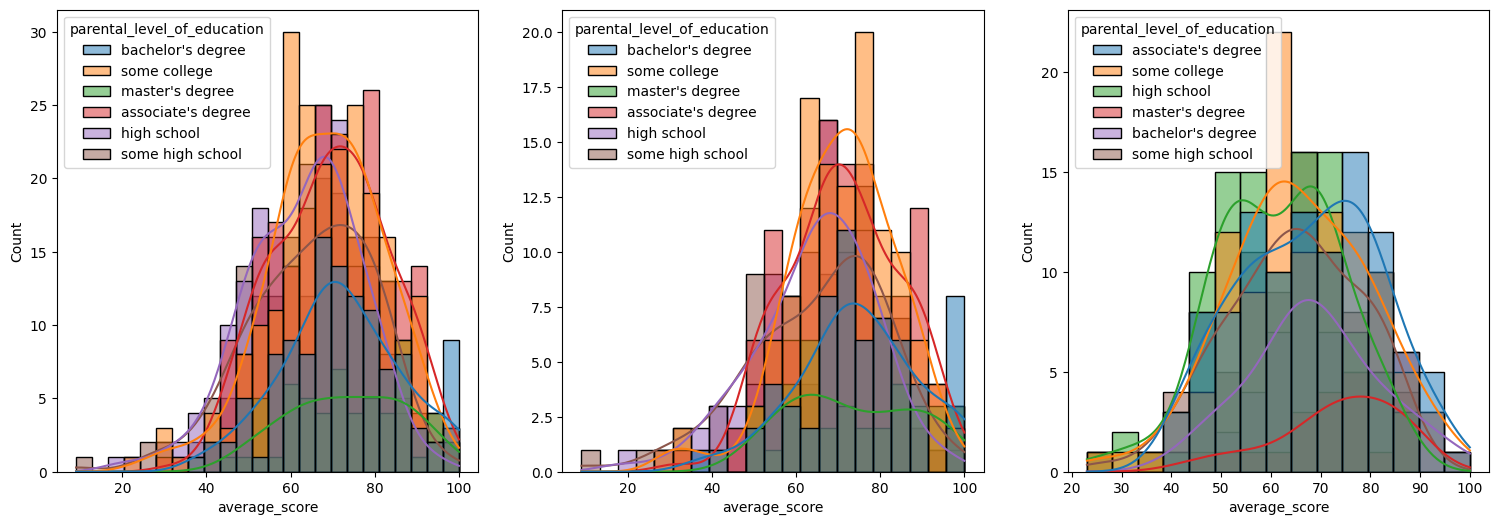

In [23]:
## Visualizing avarage for male and female according to parental_level_of_education 
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average_score", kde=True, hue="parental_level_of_education")
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x="average_score", kde=True, hue="parental_level_of_education")
plt.subplot(143)
sns.histplot(data=df[df.gender == "male"], x="average_score", kde=True, hue="parental_level_of_education")

Insights : Parents education level don't help student perform well in exam

<Axes: xlabel='average_score', ylabel='Count'>

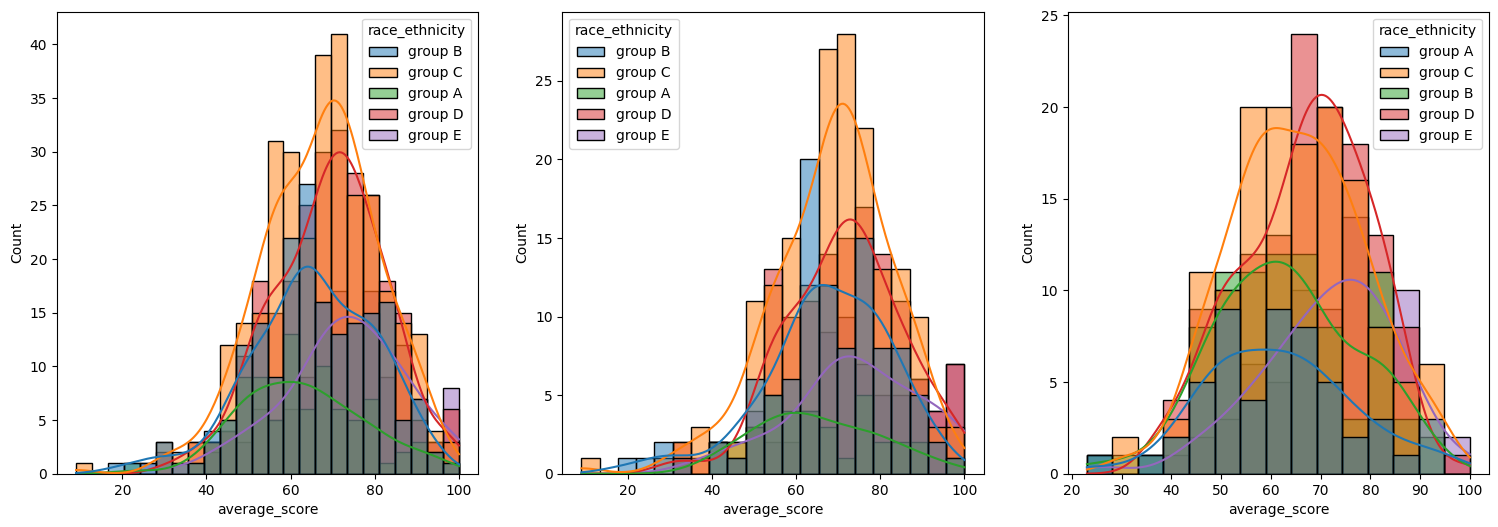

In [24]:
## Visualizing avarage for male and female according to race_ethnicity 
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average_score", kde=True, hue="race_ethnicity")
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x="average_score", kde=True, hue="race_ethnicity")
plt.subplot(143)
sns.histplot(data=df[df.gender == "male"], x="average_score", kde=True, hue="race_ethnicity")

Insights :
- Student of Group A and E perform poor in the exam irrespectively they are male or female
- Student of Group C and D perform well in the exam

#### 4.3 Multivariate analysis using pieplot

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


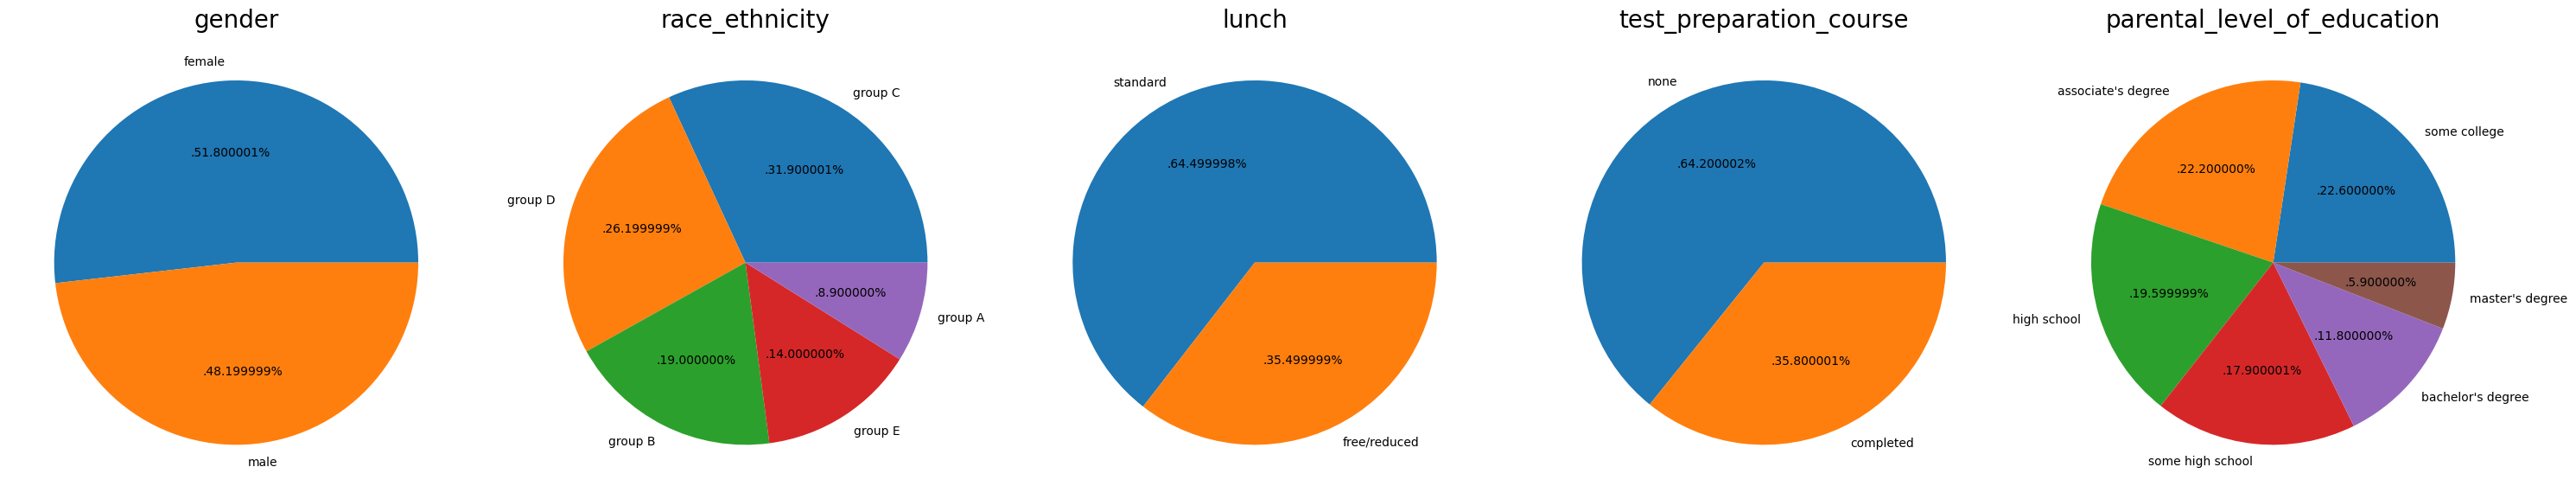

In [26]:
## Pie Plot
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
plt.pie(size,labels = size.index, autopct = '.%2f%%')
plt.title('gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df["race_ethnicity"].value_counts()
plt.pie(size, labels = size.index , autopct=".%2f%%")
plt.title("race_ethnicity", fontsize= 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df["lunch"].value_counts()
plt.pie(size, labels=size.index, autopct=".%2f%%")
plt.title("lunch", fontsize=20)
plt.axis("off")

plt.subplot(1,5,4)
size = df["test_preparation_course"].value_counts()
plt.pie(size, labels=size.index, autopct=".%2f%%")
plt.title("test_preparation_course", fontsize=20)
plt.axis("off")

plt.subplot(1,5,5)
size = df["parental_level_of_education"].value_counts()
plt.pie(size, labels=size.index, autopct=".%2f%%")
plt.title("parental_level_of_education", fontsize=20)
plt.axis("off")

plt.tight_layout()
plt.grid()

plt.show()

Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
##### 4.4.1 Gender column
- How is distribution of Gender?
- Is gender has any impact on student's performance?


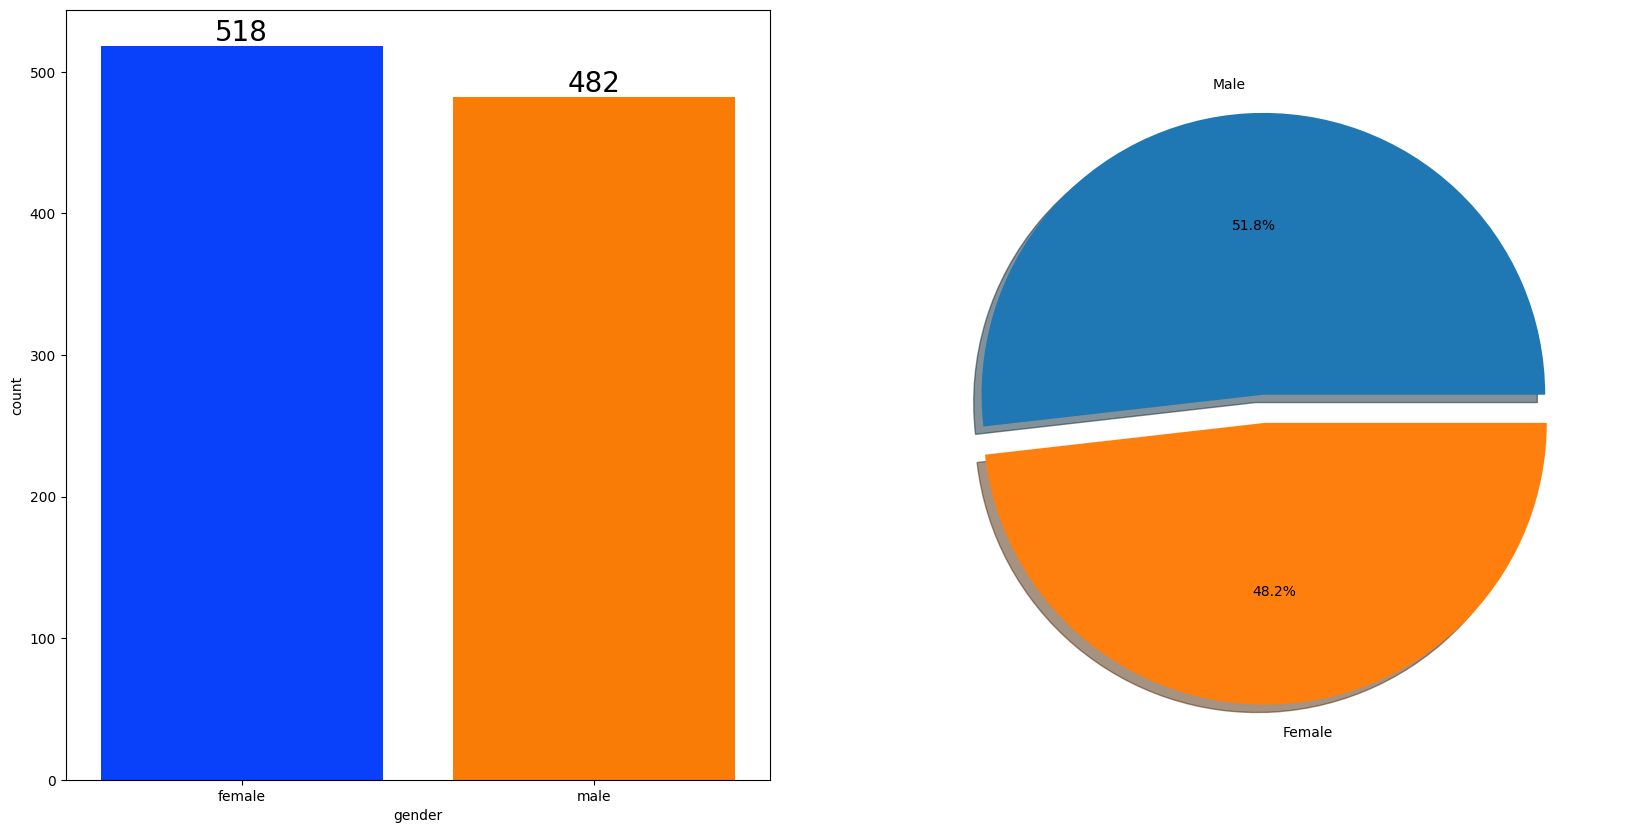

In [31]:
## Univeriate analysis ( How is distribution of Gender ? )
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct="%1.1f%%", shadow=True)
plt.show()

Insight : Gender has balanced data with female students are 518 (48%) and male student are 482 (52%)